### 휴먼지능정보공학과 201910787 김영서

a) my_imresize function을 만드세요. 반드시 def my_imresize(img, scale) 형태로 만들어야 합니다. 여기서, img는 확대나 축소할 image 이름, scale은 확대 또는 축소비율 (scale=2.9 : 2.9배 크기 확대, scale=0.668 :66.8%로 크기 축소)

b) a)에서 만든 function을 사용하여 실제 영상을 읽고, 확대하고 축소하고, 실제 크기로 display 하세요.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import skimage
from skimage import data

이미지의 실제 사이즈로 출력하는 함수는 다음과 같다.

In [13]:
def display_image_in_actual_size(im):

    dpi = mpl.rcParams['figure.dpi']
    #im_data = plt.imread(im_path)
    height, width= im.shape

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im, cmap='gray')

    plt.show()

my_imresize function은 다음과 같다.

In [14]:
def my_imresize(original_img, scale):
   
    inverse_scale = 1/scale
    (x,y) = original_img.shape
    (ix, iy)= (int(x*scale), int(y*scale))
    interpolated_image=np.zeros((ix, iy), dtype="uint8")

    for i in np.arange(ix-1):
        row = i*inverse_scale
        irow = int(row)
        a = row - irow
        for j in np.arange(iy-1):
            col = j*inverse_scale
            icol = int(col)
            b = col - icol
            interpolated_image[i, j] = (original_img[irow,icol]*(1-a)*(1-b) + original_img[irow,icol+1]*a*(1-b) 
                               + original_img[irow+1,icol]*(1-a)*b + original_img[irow+1,icol+1]*a*b).astype("uint8")
    return interpolated_image

이미지의 원래 사이즈는 다음과 같다.
- 512x512

In [16]:
cam = data.camera()
original_img = cam.copy()
original_img.shape

(512, 512)

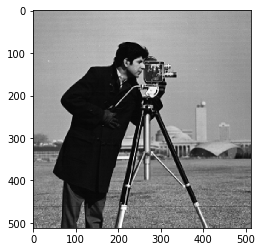

In [10]:
plt.imshow(original_img, cmap=plt.cm.gray)

이미지를 실제 크기로 display한 것은 다음과 같다.

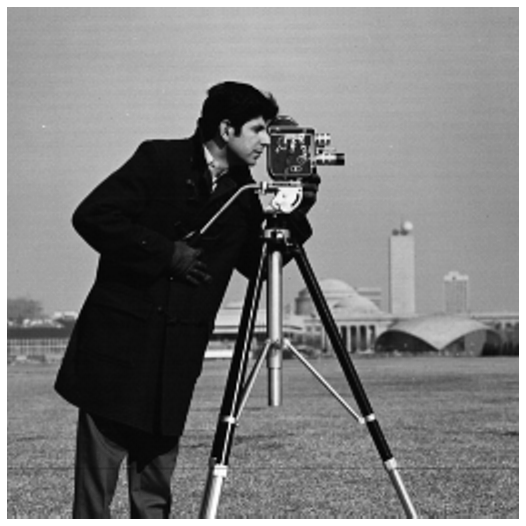

In [15]:
cam = data.camera()
(x,y)=cam.shape
oi = cam.copy()
scale=0.64
inv_scale = 1/scale
(ix, iy)= (int(x*scale), int(y*scale))
int_image=np.zeros((ix, iy), dtype="uint8")

for i in np.arange(ix-1):
    row = i*inv_scale
    irow = int(row)
    a = row - irow
    for j in np.arange(iy-1):
        col = j*inv_scale
        icol = int(col)
        b = col - icol
        int_image[i, j] = (oi[irow,icol]*(1-a)*(1-b) + oi[irow,icol+1]*a*(1-b) +
                           oi[irow+1,icol]*(1-a)*b + oi[irow+1,icol+1]*a*b).astype("uint8")
#plt.imshow(oi, cmap=plt.cm.gray)
#plt.imshow(int_image, cmap=plt.cm.gray)
#plt.show()
display_image_in_actual_size(oi)


원래 이미지의 0.668배 크기로 축소한 것은 다음과 같다.
- 342x342

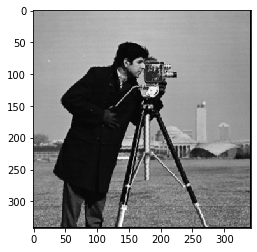

In [17]:
interpolated_image = my_imresize(original_img,0.668)
plt.imshow(interpolated_image,cmap=plt.cm.gray)

In [18]:
interpolated_image.shape

(342, 342)

원래 이미지의 1.9배 크기로 확대한 것은 다음과 같다.
- 972x972

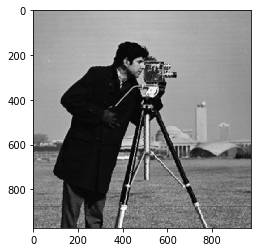

In [19]:
interpolated_image = my_imresize(original_img,1.9)
plt.imshow(my_imresize(original_img,1.9),cmap=plt.cm.gray)

In [20]:
interpolated_image.shape

(972, 972)